In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
path_train_inbalanced_downsampled_augmented = "./data/inbalanced_downsampled_augmented/train_inbalanced_downsampled_augmented.csv"
path_val_inbalanced_downsampled_augmented = "./data/inbalanced_downsampled_augmented/val_inbalanced_downsampled_augmented.csv"
path_test_inbalanced_downsampled_augmented = "./data/inbalanced_downsampled_augmented/test_inbalanced_downsampled_augmented.csv"

In [20]:
path_train_balanced_downsampled_augmented = "./data/balanced_downsampled_augmented/train_balanced_downsampled_augmented.csv"
path_val_balanced_downsampled_augmented = "./data/balanced_downsampled_augmented/val_balanced_downsampled_augmented.csv"
path_test_balanced_downsampled_augmented = "./data/balanced_downsampled_augmented/test_balanced_downsampled_augmented.csv"

In [4]:
df_full = pd.read_csv("./data/full_dataset.csv",delimiter=",", encoding="utf8")

In [13]:
def analyze_dataset(df, dataset_name="Dataset"):
    """
    Analyzes a single dataset by:
      - Plotting a bar chart of review counts per unique rating with annotations.
      - Plotting a histogram of review lengths with the y-axis on a logarithmic scale 
        and a fixed x-axis range from 0 to 1600, with annotations.
      - Plotting the distribution of review lengths for each rating, with each subplot
        showing its own x-axis label.
    
    Parameters:
      df: pd.DataFrame containing at least the columns 'Rating' and 'Review_Length'.
      dataset_name: A string label for the dataset.
    """
    # --- Part 1: Bar Chart for Review Counts per Unique Rating ---
    rating_counts = df['Rating'].value_counts().sort_index()
    print(f"Review counts per unique rating for {dataset_name}:")
    print(rating_counts)
    
    fig1, ax1 = plt.subplots(figsize=(8, 6))
    bars = ax1.bar(rating_counts.index.astype(str), rating_counts.values, 
                   color='cornflowerblue', edgecolor='black')
    ax1.set_title(f"Review Counts per Unique Rating for {dataset_name}")
    ax1.set_xlabel("Rating")
    ax1.set_ylabel("Review Count")
    
    # Annotate each bar with its count.
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width()/2, height),
                     xytext=(0, 5),  # 5 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # --- Part 2: Histogram for Distribution of Review Lengths ---
    # Fixed x-axis range (0 to 1600) with y-axis on log scale.
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    counts, bins, patches = ax2.hist(df['Review_Length'], bins=30, range=(0, 1600), 
                                     color='salmon', edgecolor='black')
    ax2.set_yscale('log')
    ax2.set_title(f"Distribution of Review Lengths for {dataset_name} (Log y-axis)")
    ax2.set_xlabel("Review Length")
    ax2.set_ylabel("Frequency (log scale)")
    
    # Annotate each histogram bar with its count.
    for count, patch, left, right in zip(counts, patches, bins[:-1], bins[1:]):
        if count > 0:
            center = (left + right) / 2
            ax2.annotate(f'{int(count)}', 
                         xy=(center, count),
                         xytext=(0, 5),
                         textcoords="offset points",
                         ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # --- Part 3: Distribution of Review Lengths by Rating ---
    unique_ratings = sorted(df['Rating'].unique())
    n = len(unique_ratings)
    
    # Create subplots without sharing the x-axis so each subplot shows its own x label.
    fig3, axes = plt.subplots(n, 1, figsize=(8, 4*n))
    if n == 1:
        axes = [axes]
    
    for ax, rating in zip(axes, unique_ratings):
        sub_df = df[df['Rating'] == rating]
        counts_r, bins_r, patches_r = ax.hist(sub_df['Review_Length'], bins=30, range=(0, 1600),
                                              color='lightgreen', edgecolor='black')
        ax.set_title(f"Rating {rating} (n={len(sub_df)})")
        ax.set_xlabel("Review Length")
        ax.set_ylabel("Frequency (log scale)")
        ax.set_yscale('log')
        for count, patch, left, right in zip(counts_r, patches_r, bins_r[:-1], bins_r[1:]):
            if count > 0:
                center = (left + right) / 2
                ax.annotate(f'{int(count)}', 
                            xy=(center, count),
                            xytext=(0, 5),
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=8)
    
    fig3.suptitle(f"Review Length Distribution by Rating for {dataset_name}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


def analyze_three_datasets(train_csv, val_csv, test_csv, df_name):
    """
    Loads train, validation, and test CSV files, generates analysis plots
    for each dataset individually (including distribution of review lengths by rating),
    and then generates combined plots for the aggregated dataset.
    
    Parameters:
      train_csv: Path to the training CSV file.
      val_csv: Path to the validation CSV file.
      test_csv: Path to the test CSV file.
    """
    # Load each CSV into a DataFrame.
    df_train = pd.read_csv(train_csv)
    df_val = pd.read_csv(val_csv)
    df_test = pd.read_csv(test_csv)
    
    datasets = {
        "Train": df_train,
        "Validation": df_val,
        "Test": df_test
    }
    
    # Analyze each dataset separately.
    for name, df in datasets.items():
        analyze_dataset(df, dataset_name=name + ' ' + df_name)
    
    # Combine the three datasets.
    df_all = pd.concat([df_train, df_val, df_test], ignore_index=True)
    analyze_dataset(df_all, dataset_name="Aggregated (Train+Val+Test) " + df_name)

Review counts per unique rating for full dataset:
Rating
1     91363
2      8978
3      9552
4     32580
5    238912
Name: count, dtype: int64


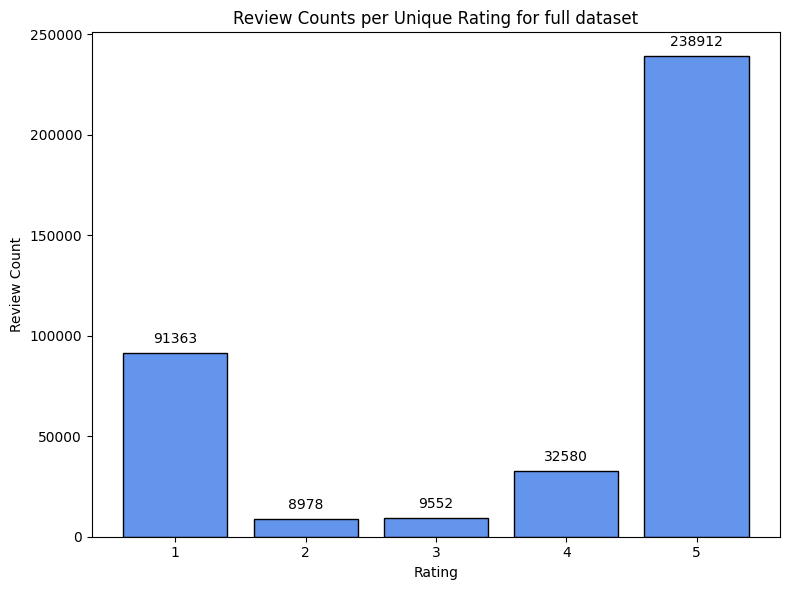

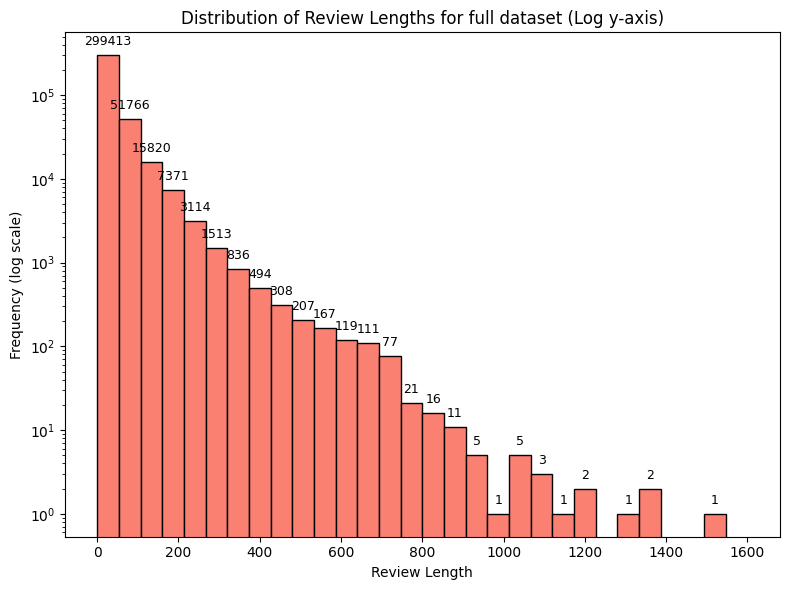

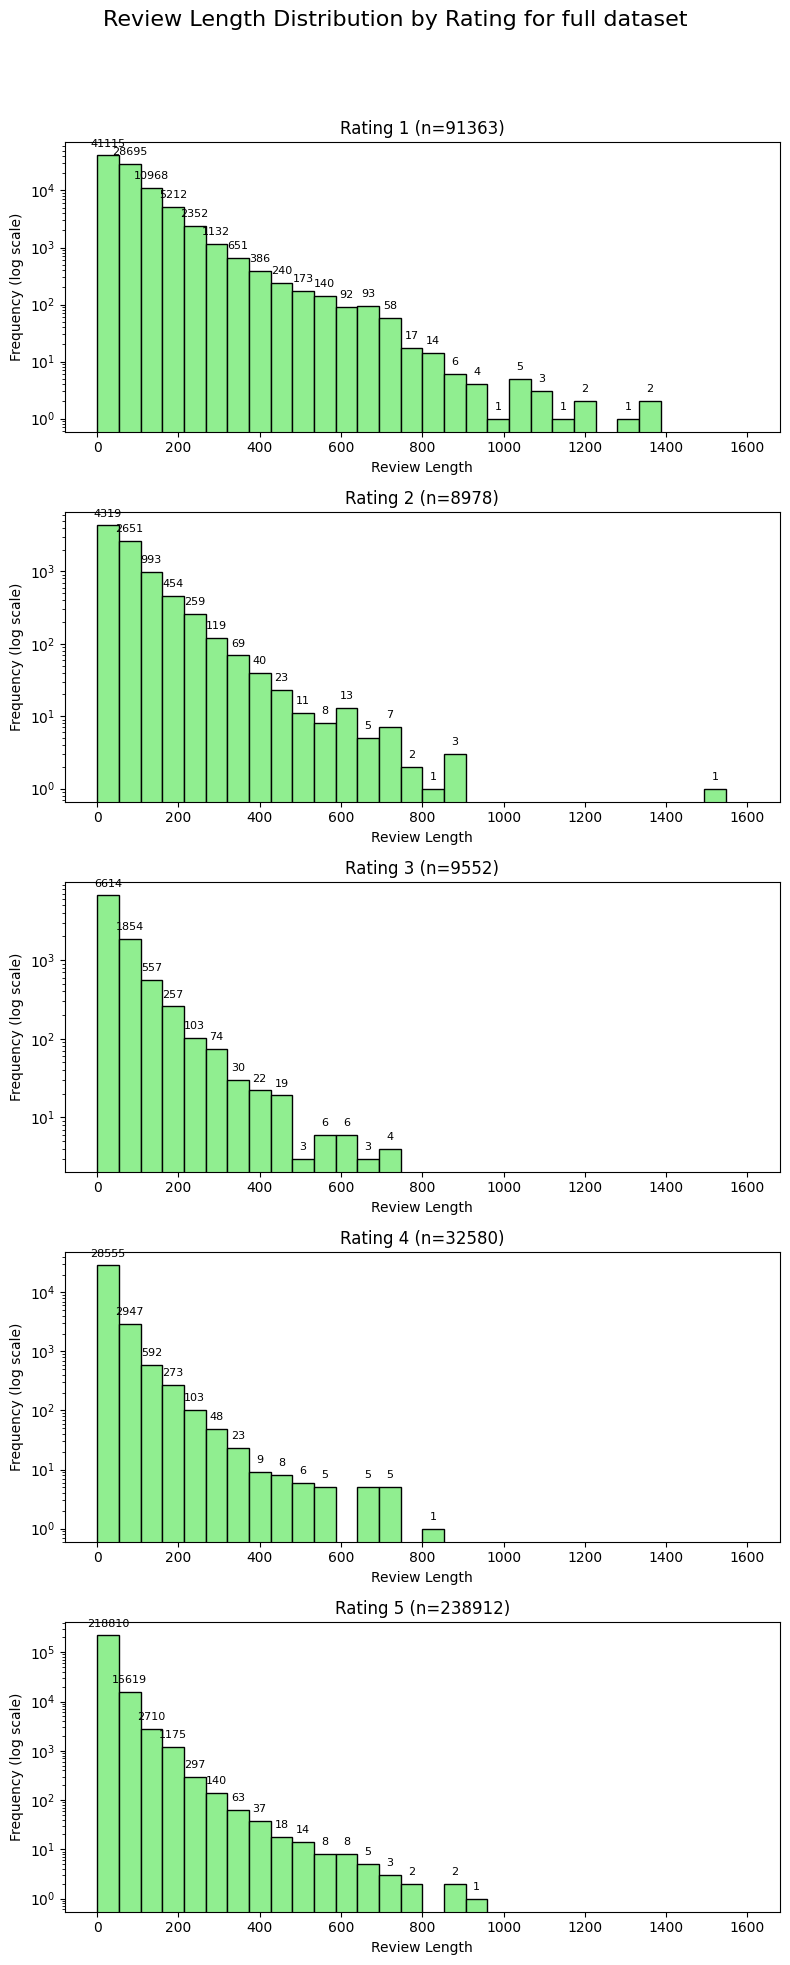

In [47]:
analyze_dataset(df_full, dataset_name="full dataset")

Review counts per unique rating for Train Balanced:
Rating
1    18900
2    18900
3    18900
4    18900
5    18900
Name: count, dtype: int64


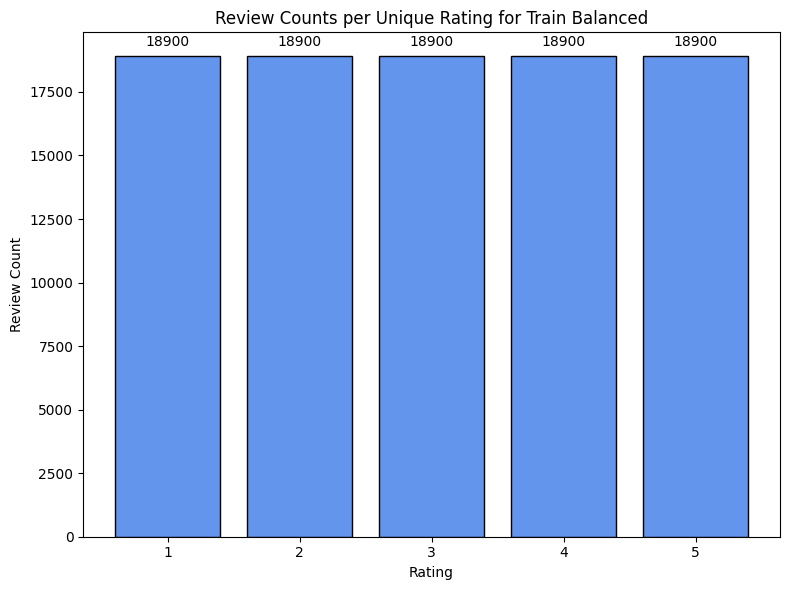

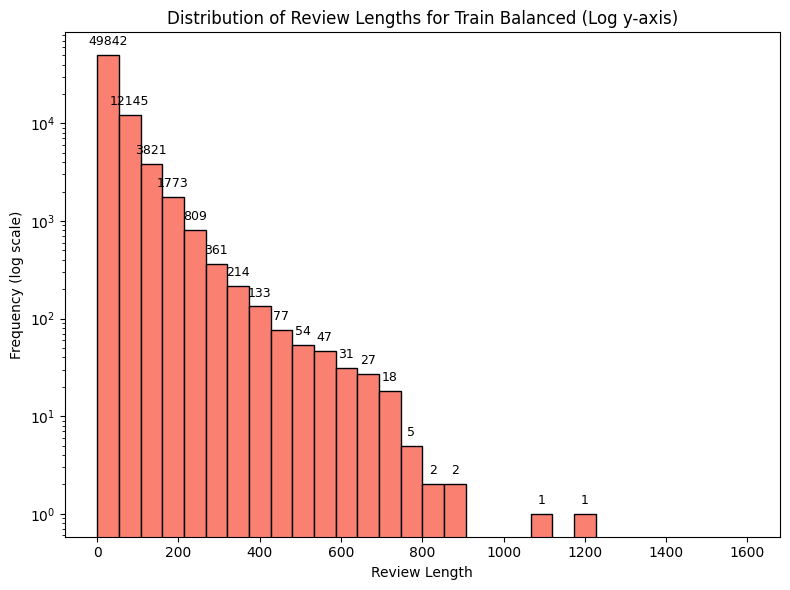

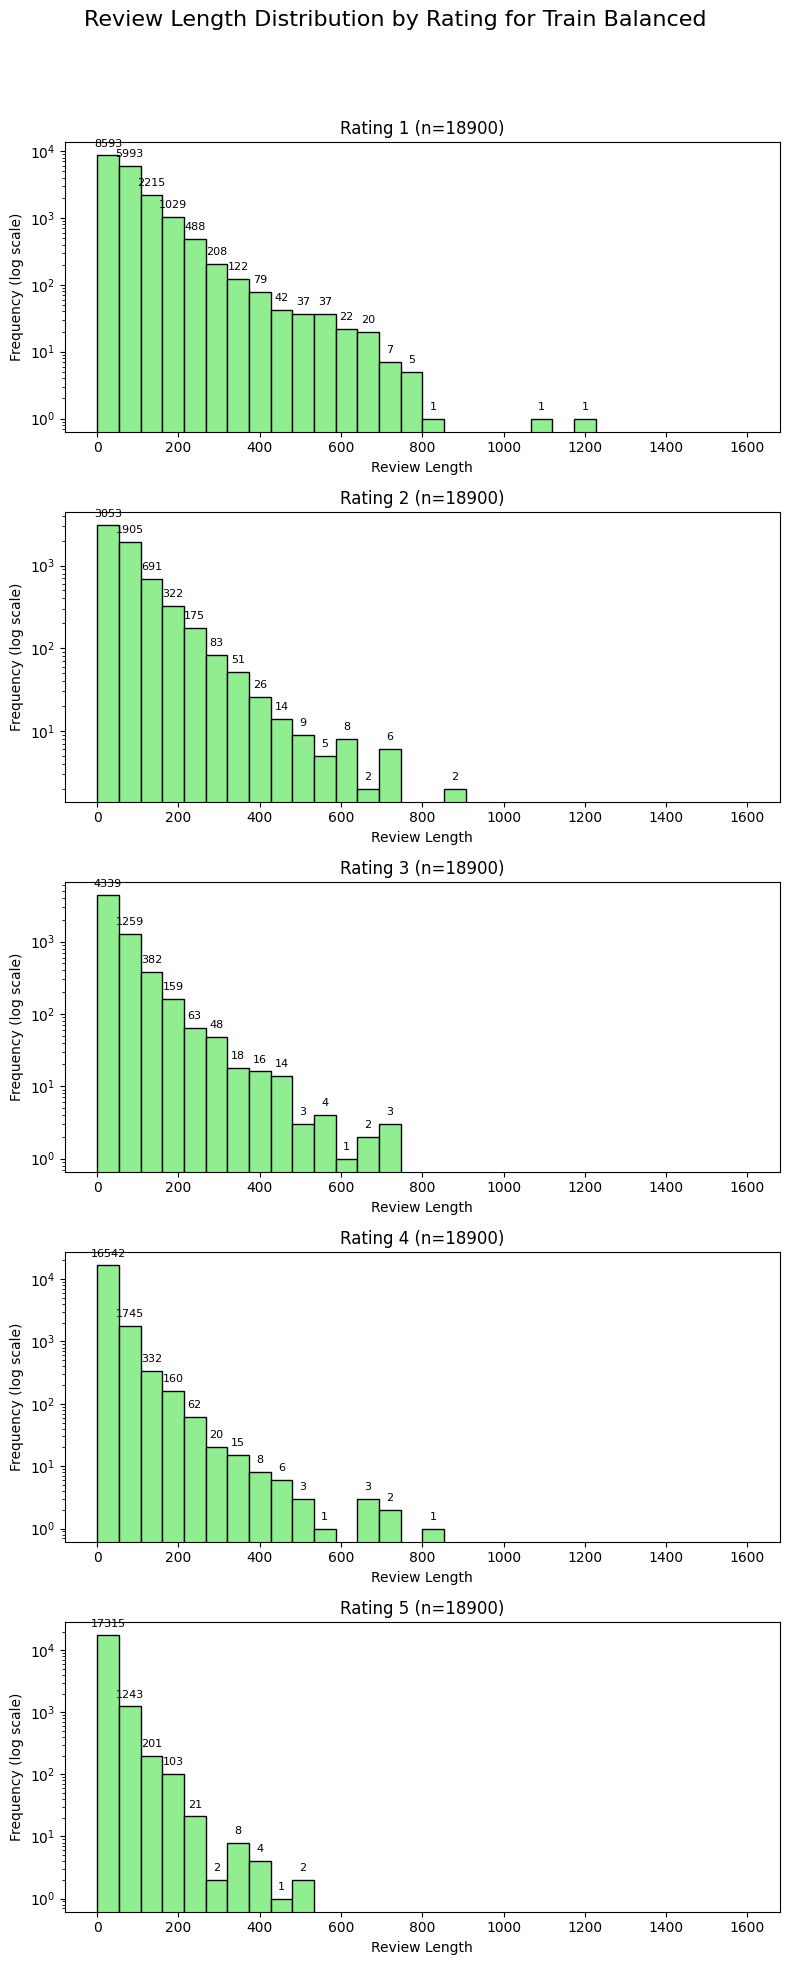

Review counts per unique rating for Validation Balanced:
Rating
1    2362
2    2363
3    2362
4    2362
5    2363
Name: count, dtype: int64


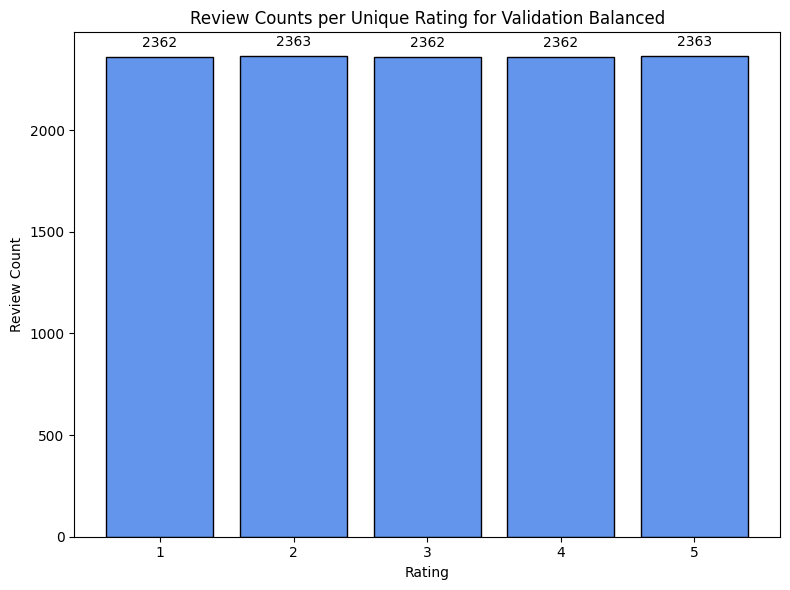

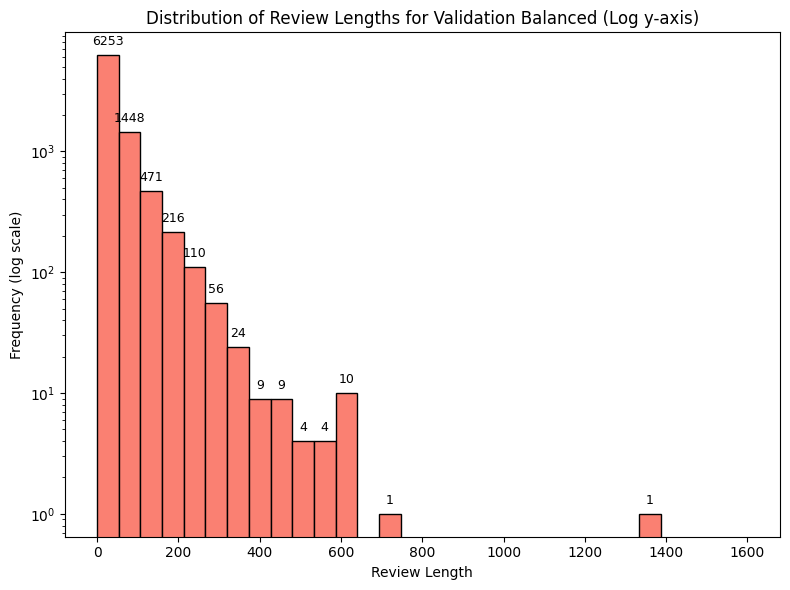

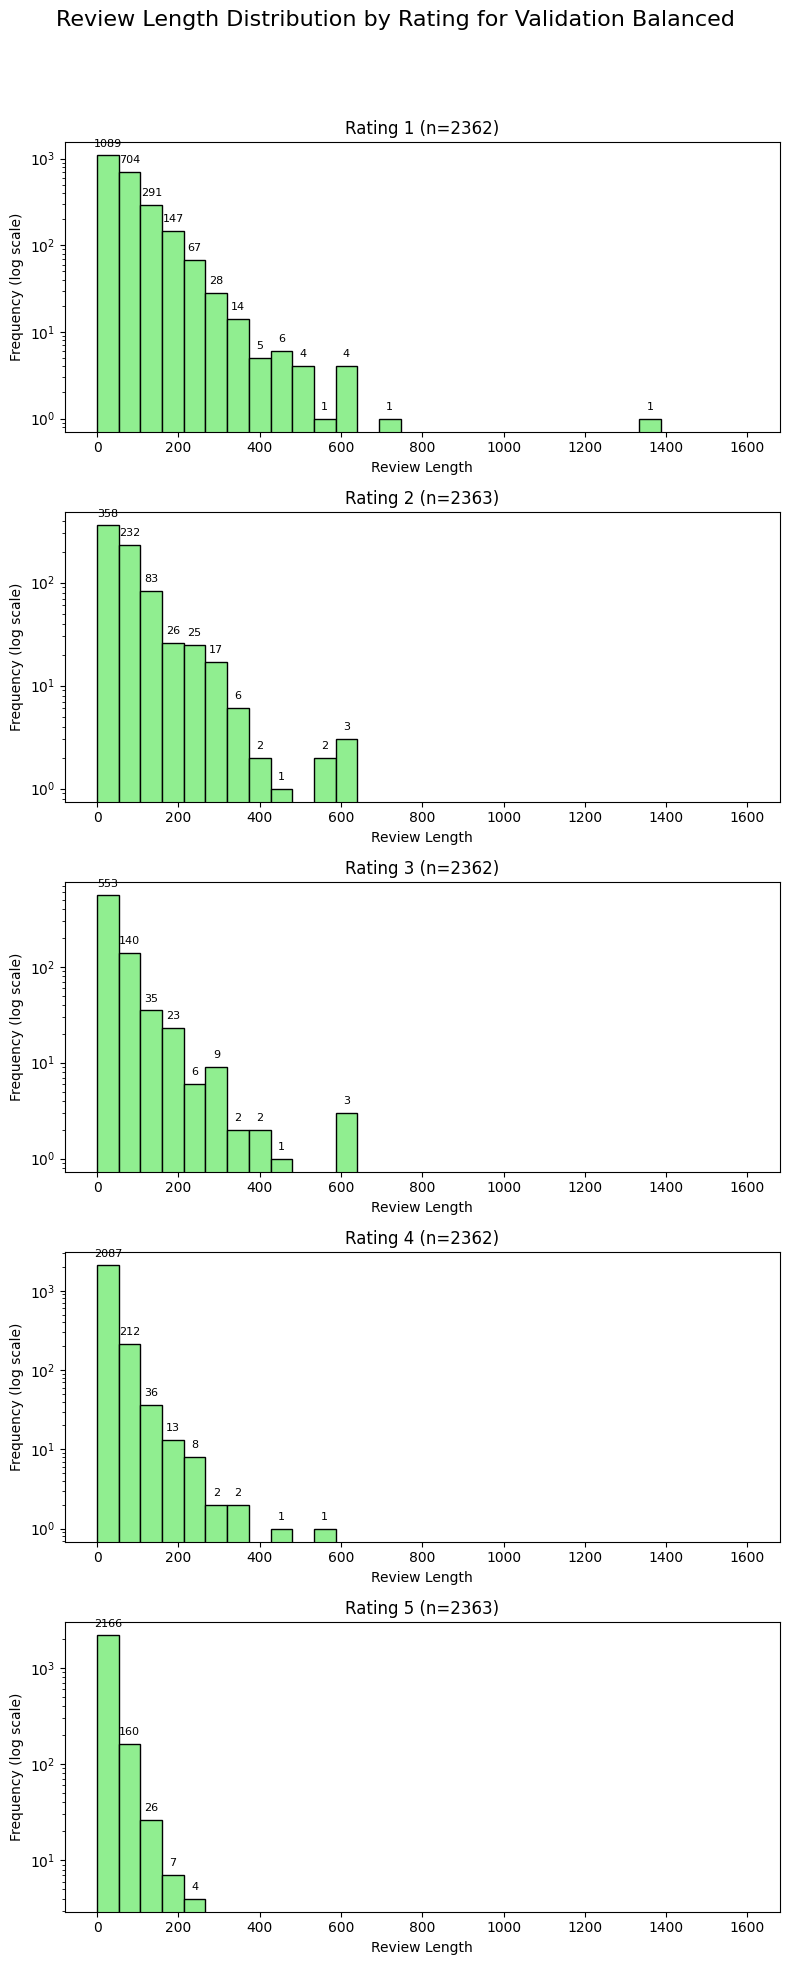

Review counts per unique rating for Test Balanced:
Rating
1    2363
2    2362
3    2363
4    2363
5    2362
Name: count, dtype: int64


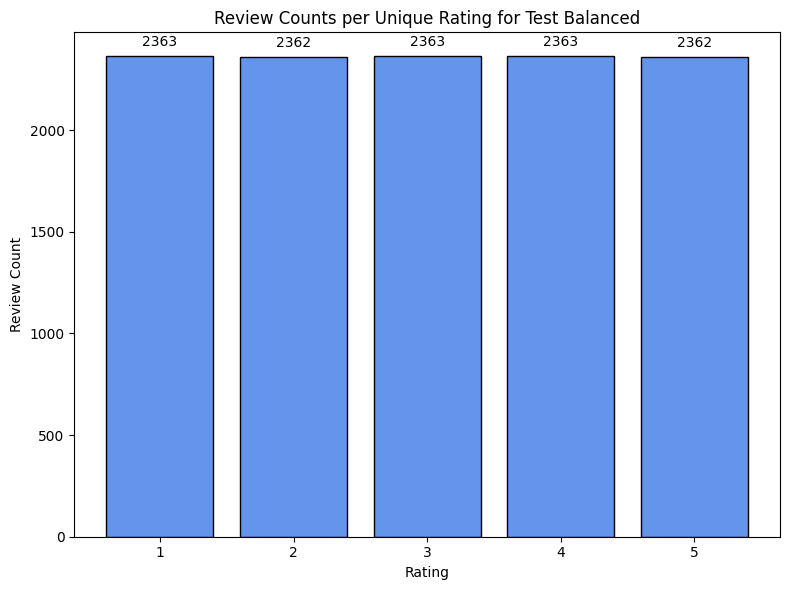

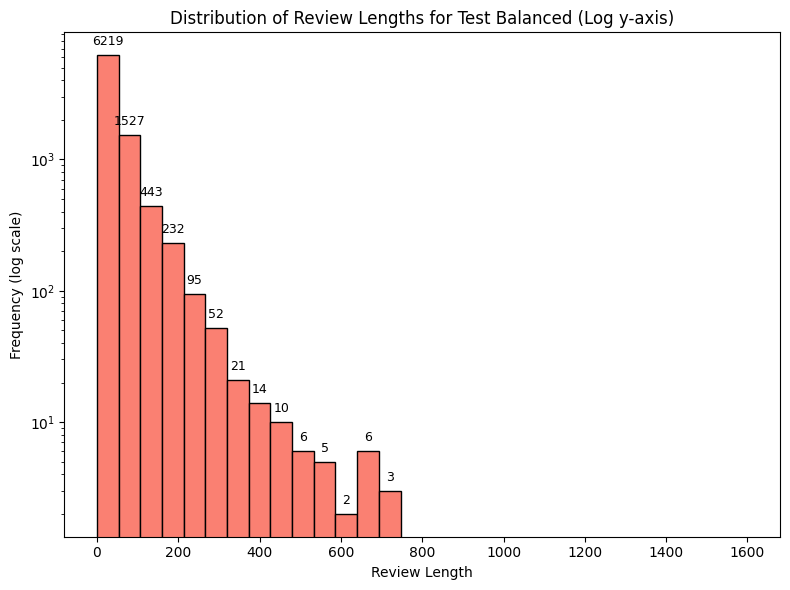

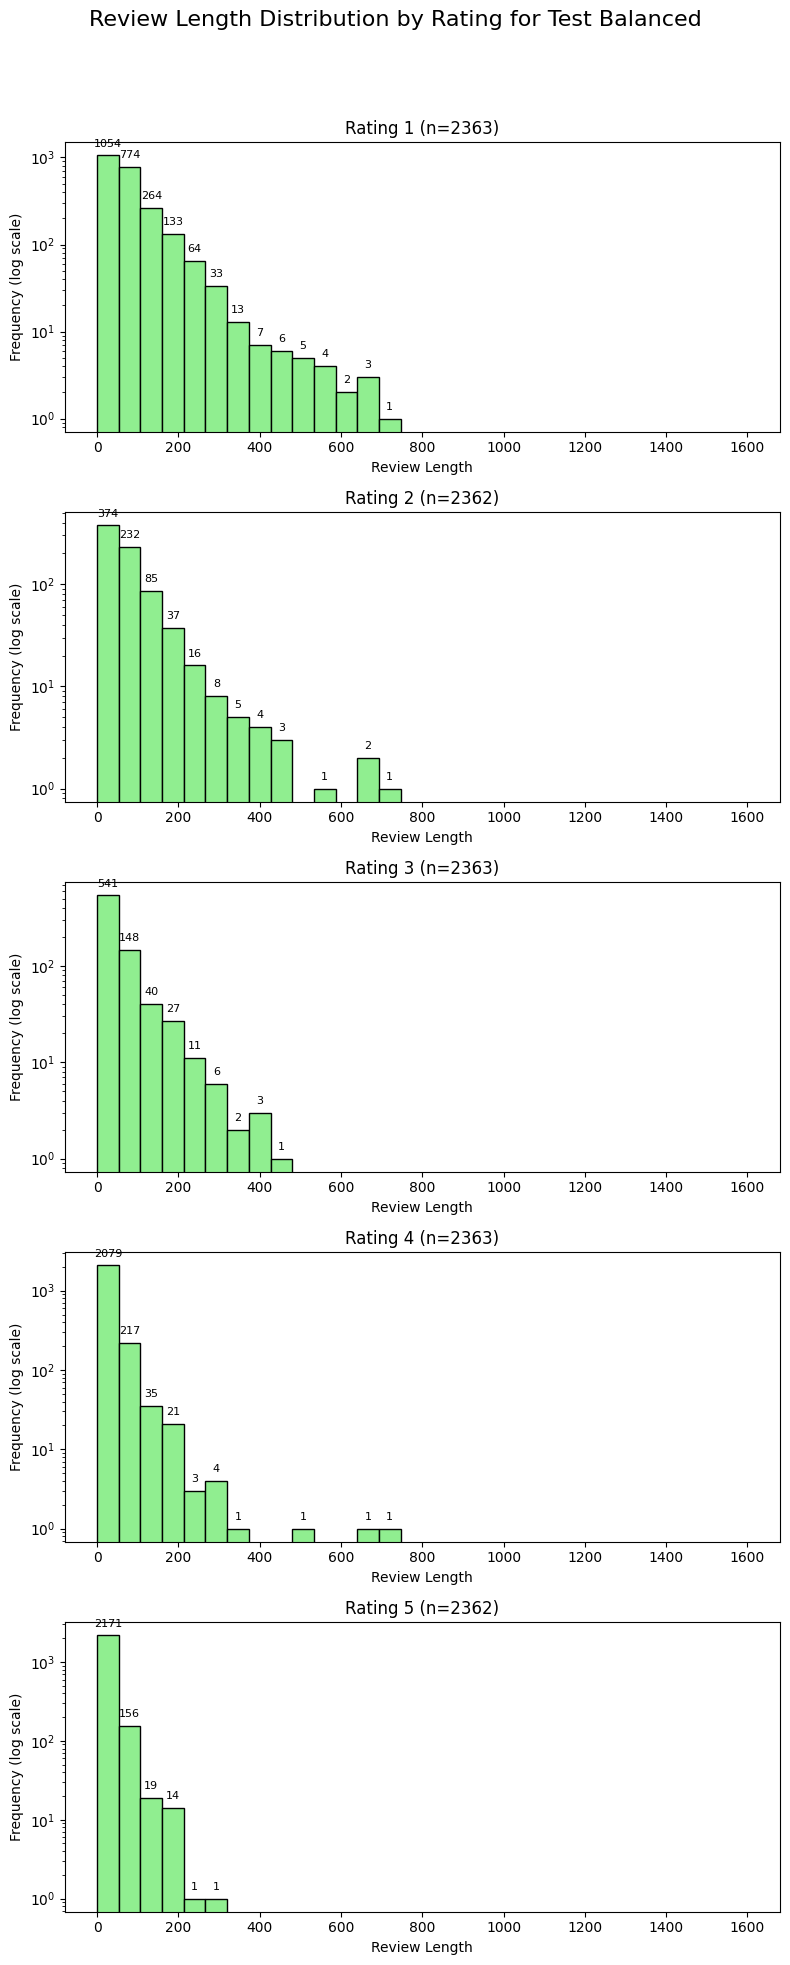

Review counts per unique rating for Aggregated (Train+Val+Test) Balanced:
Rating
1    23625
2    23625
3    23625
4    23625
5    23625
Name: count, dtype: int64


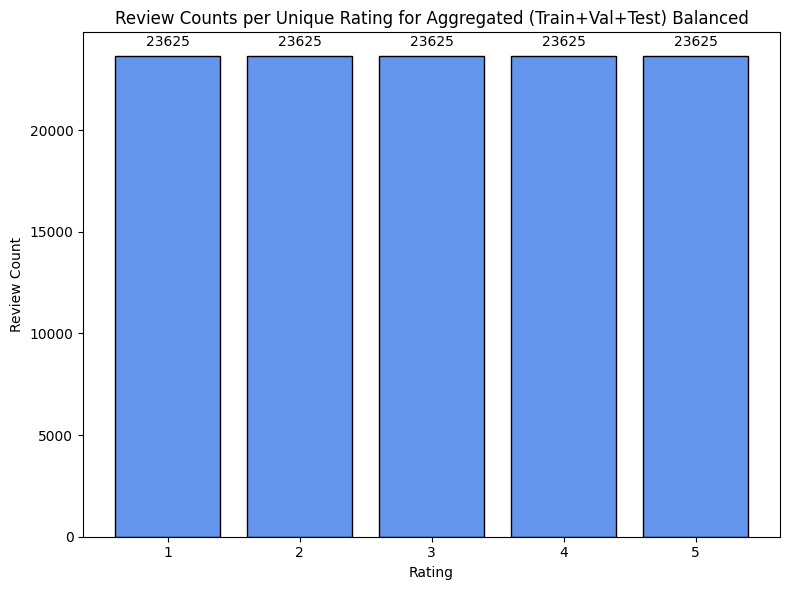

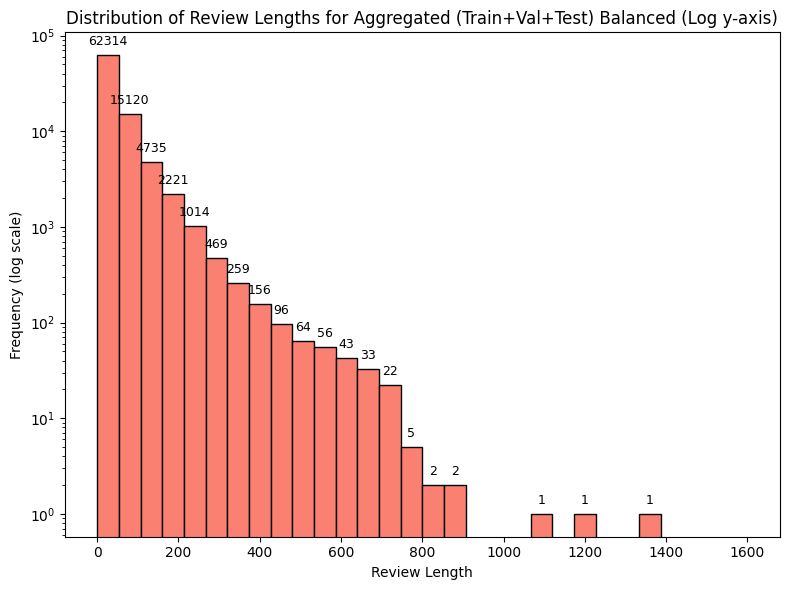

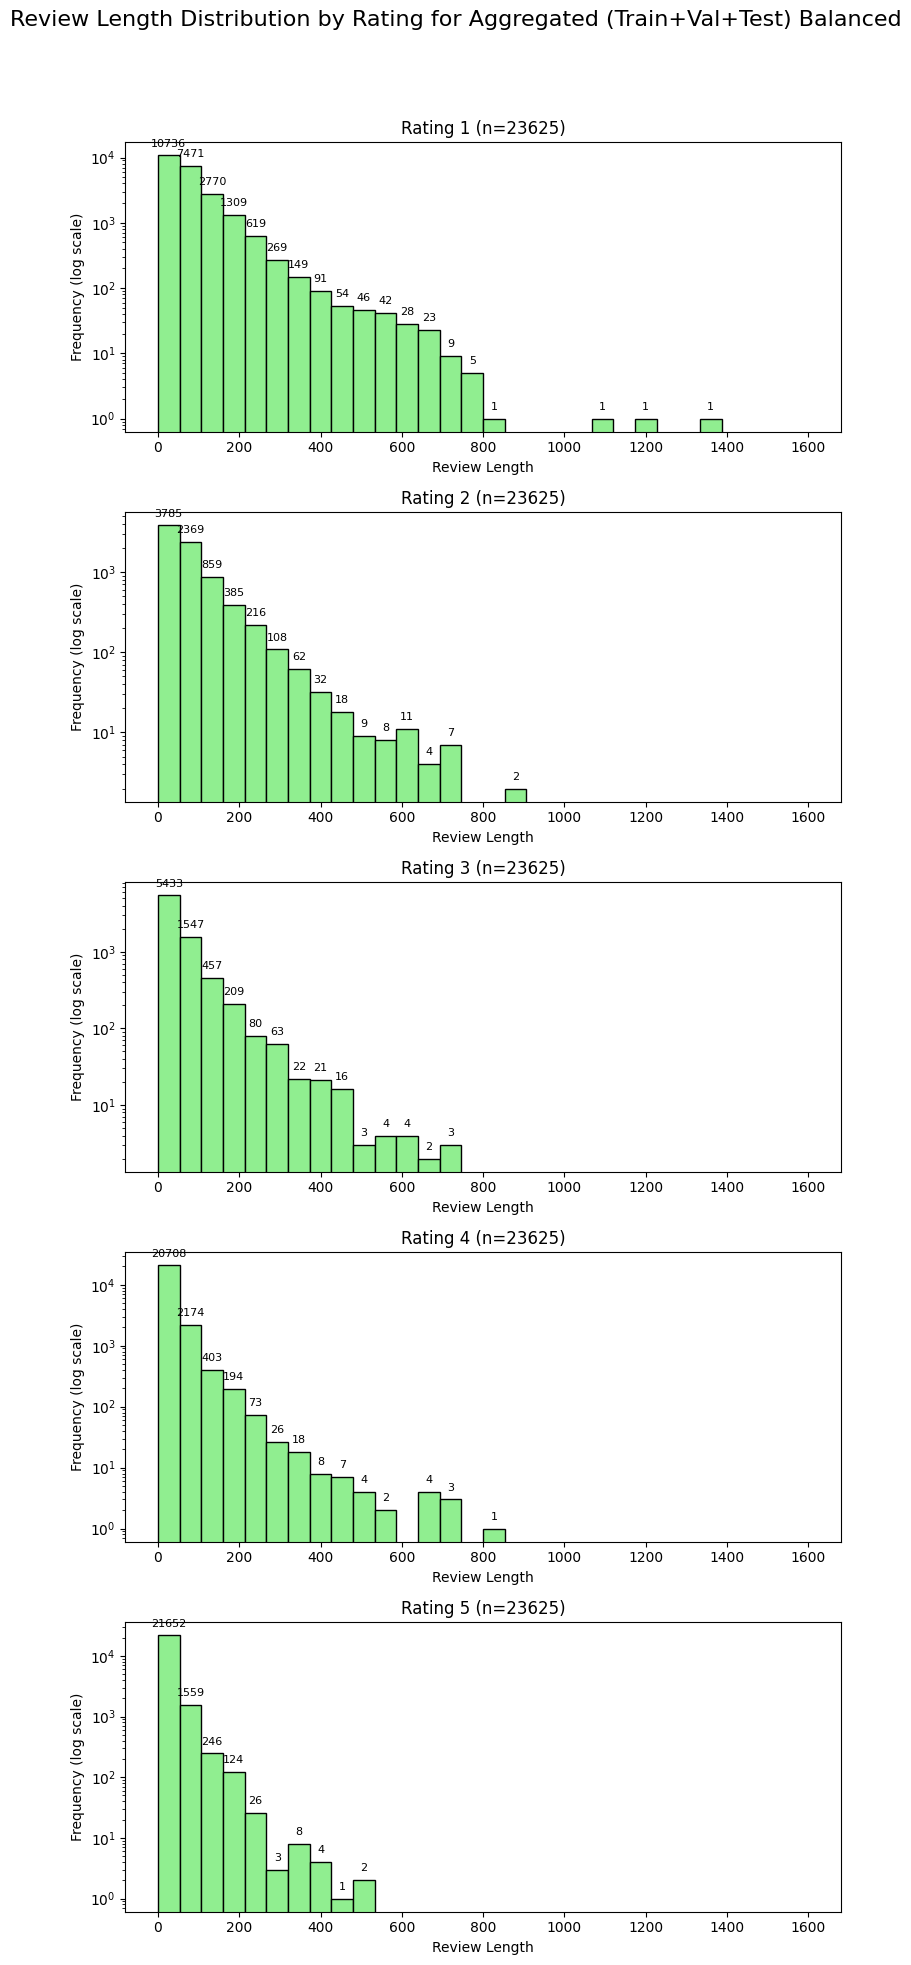

In [21]:
analyze_three_datasets(path_train_balanced_downsampled_augmented,path_val_balanced_downsampled_augmented,path_test_balanced_downsampled_augmented, 'Balanced')

Review counts per unique rating for Train Inbalanced:
Rating
1    40000
2    18900
3    19802
4    20998
5    40000
Name: count, dtype: int64


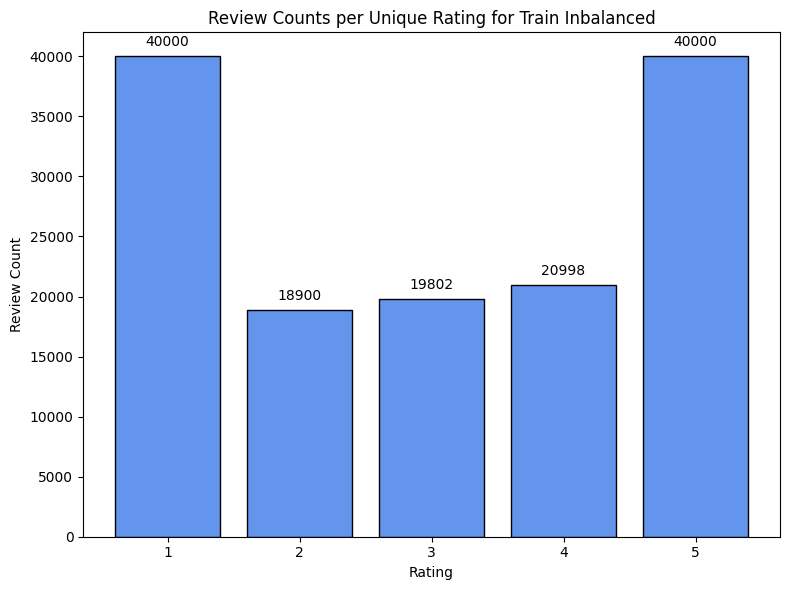

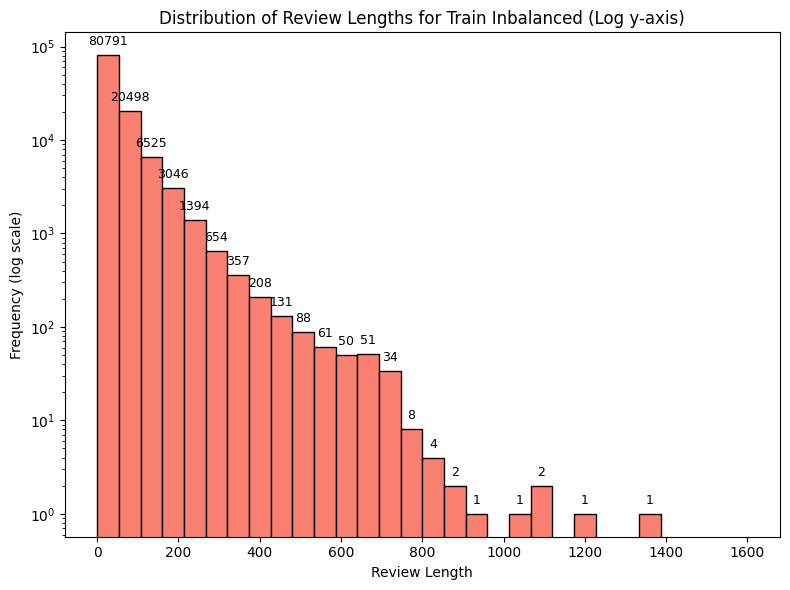

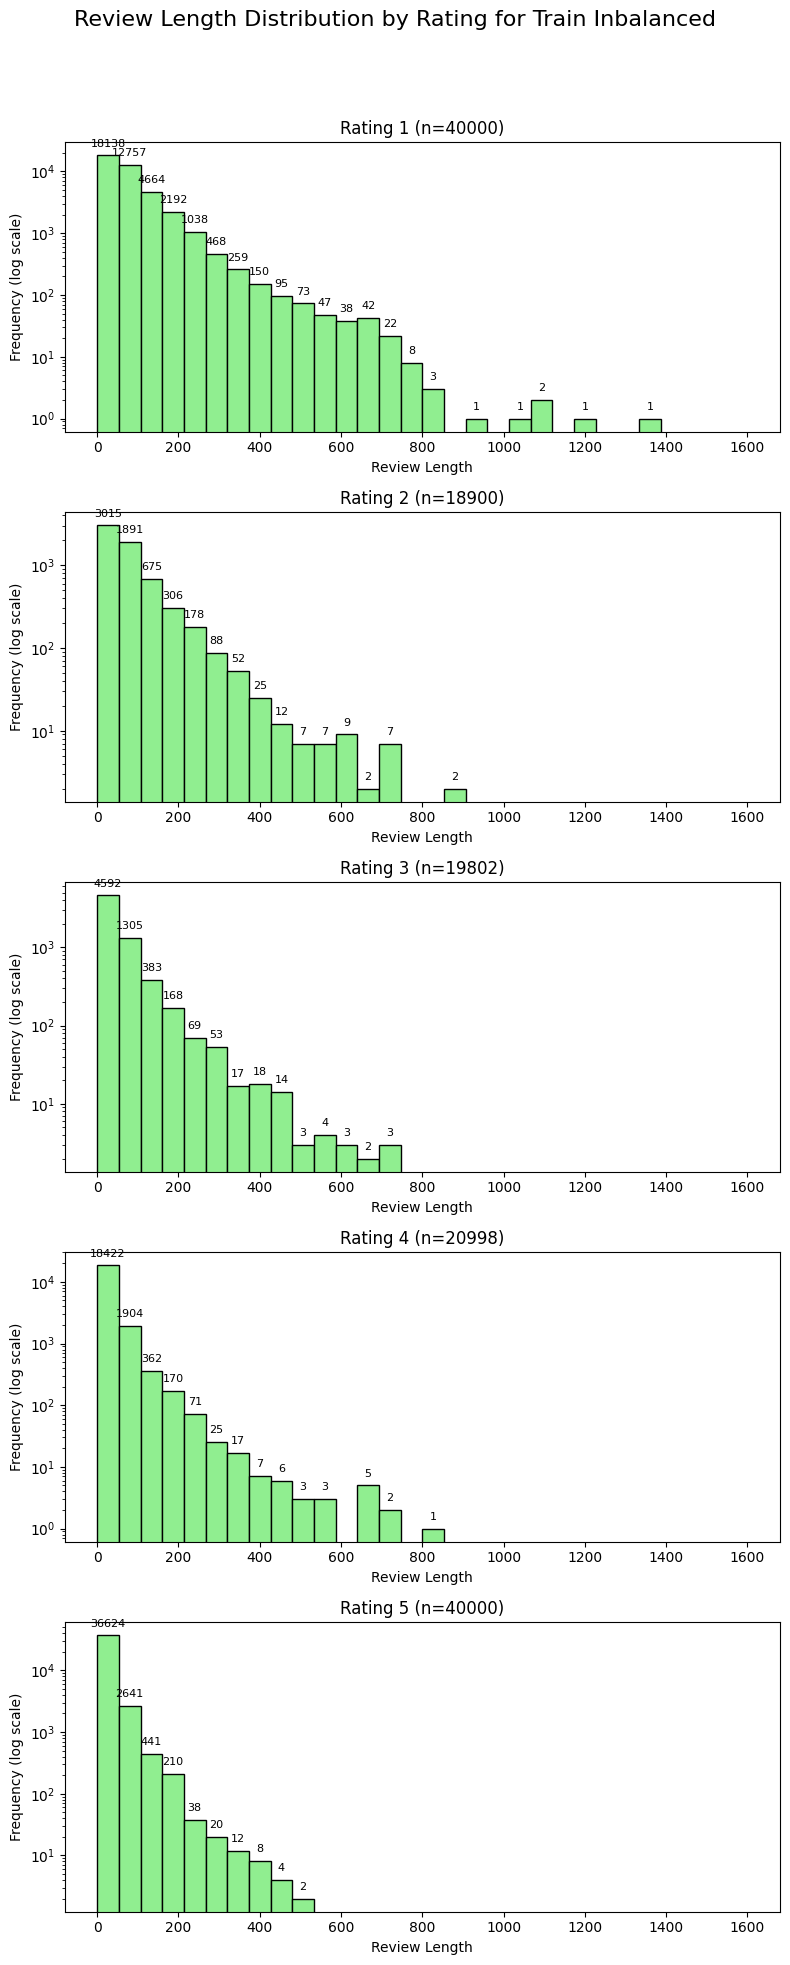

Review counts per unique rating for Validation Inbalanced:
Rating
1    5000
2    2362
3    2476
4    2625
5    5000
Name: count, dtype: int64


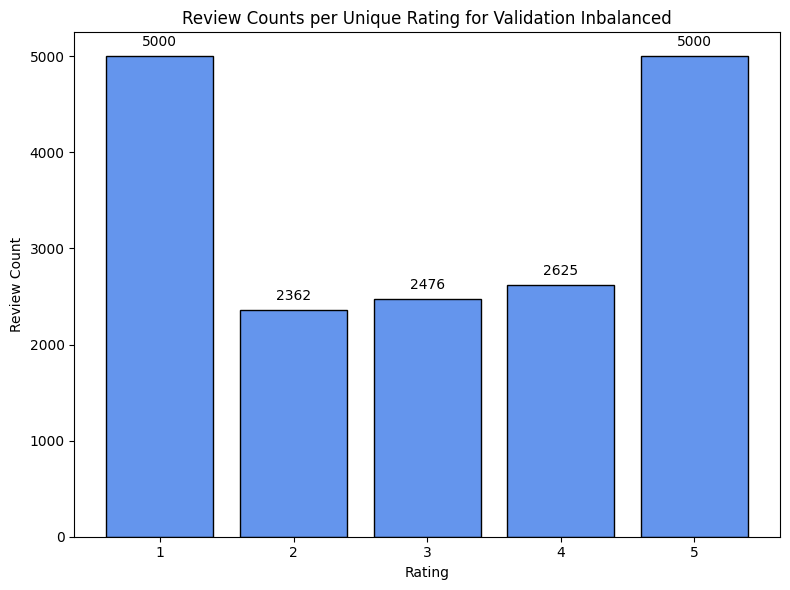

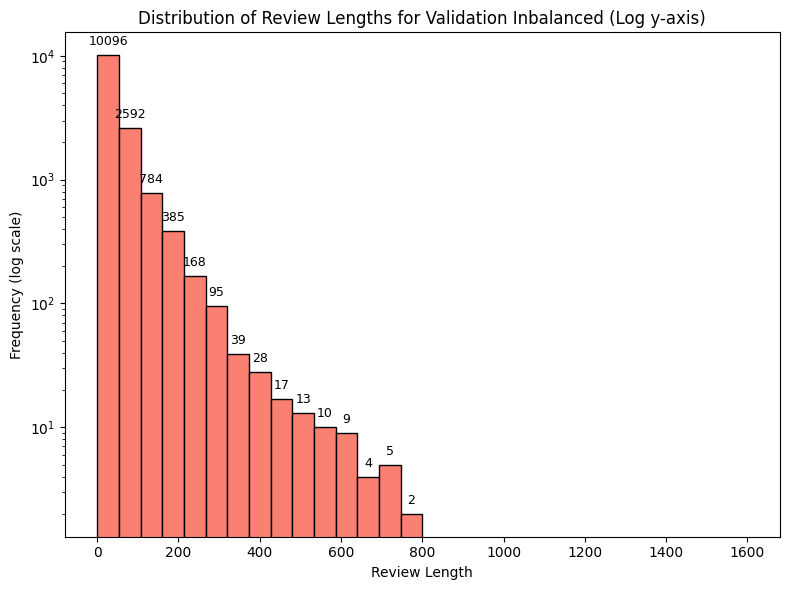

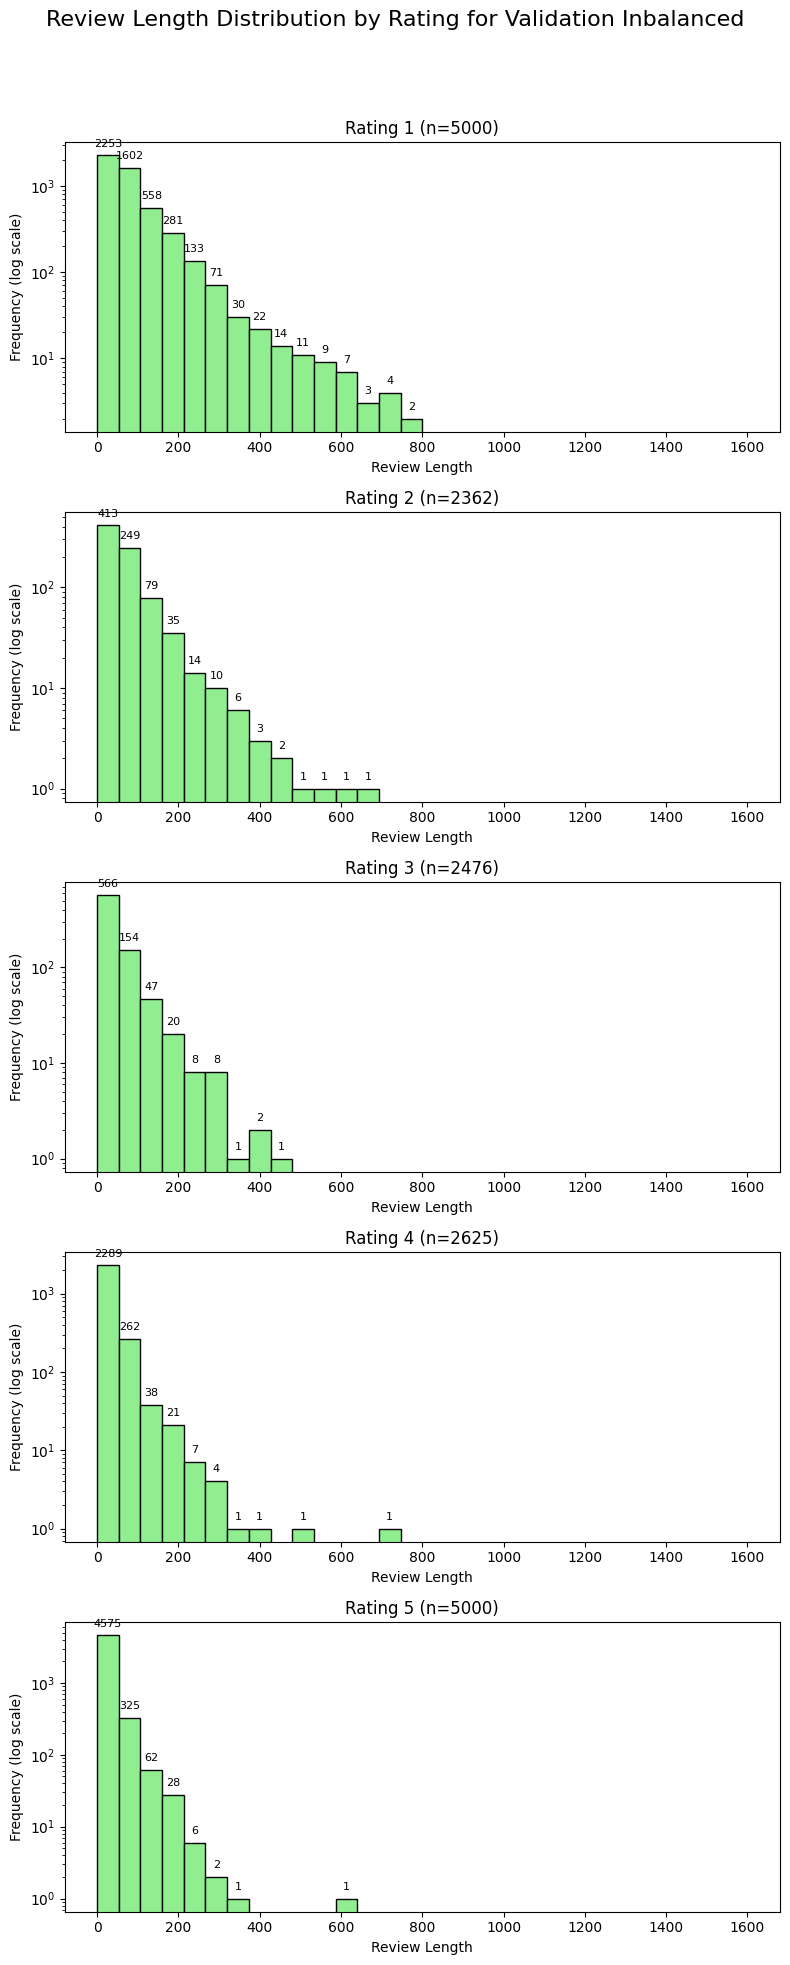

Review counts per unique rating for Test Inbalanced:
Rating
1    5000
2    2363
3    2475
4    2625
5    5000
Name: count, dtype: int64


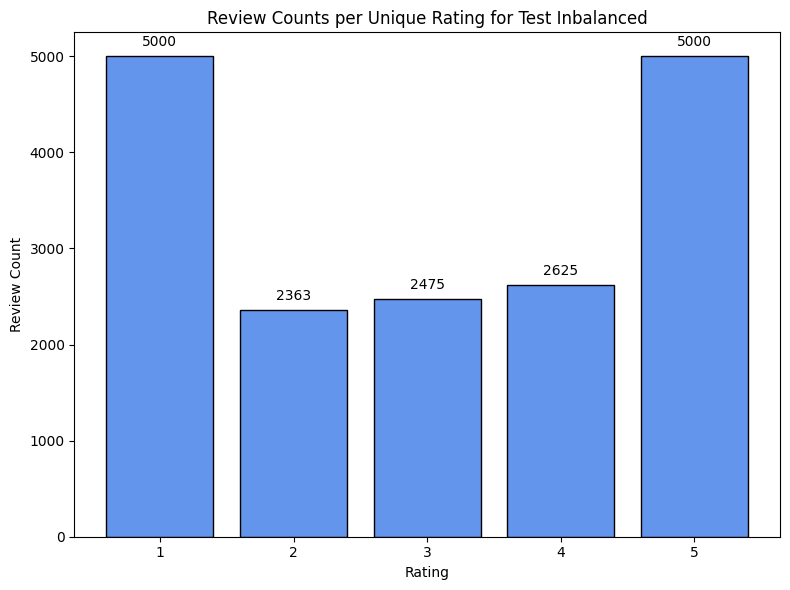

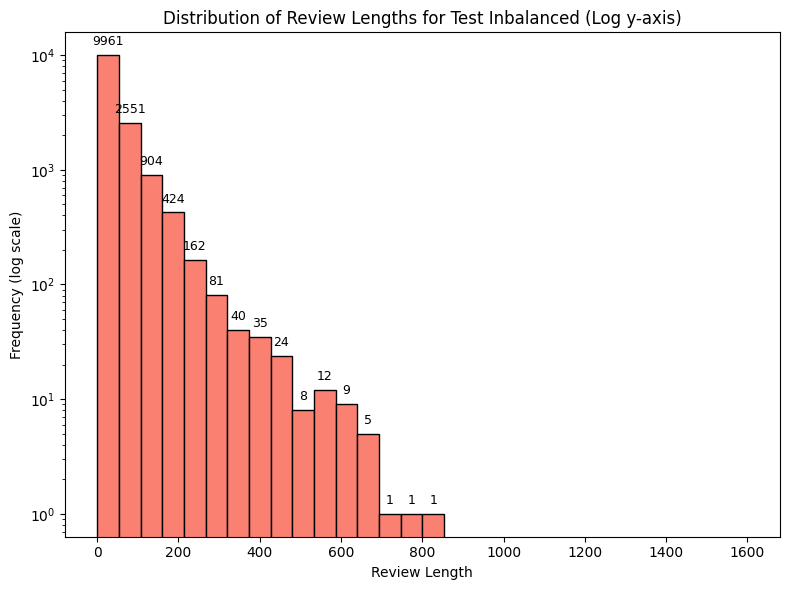

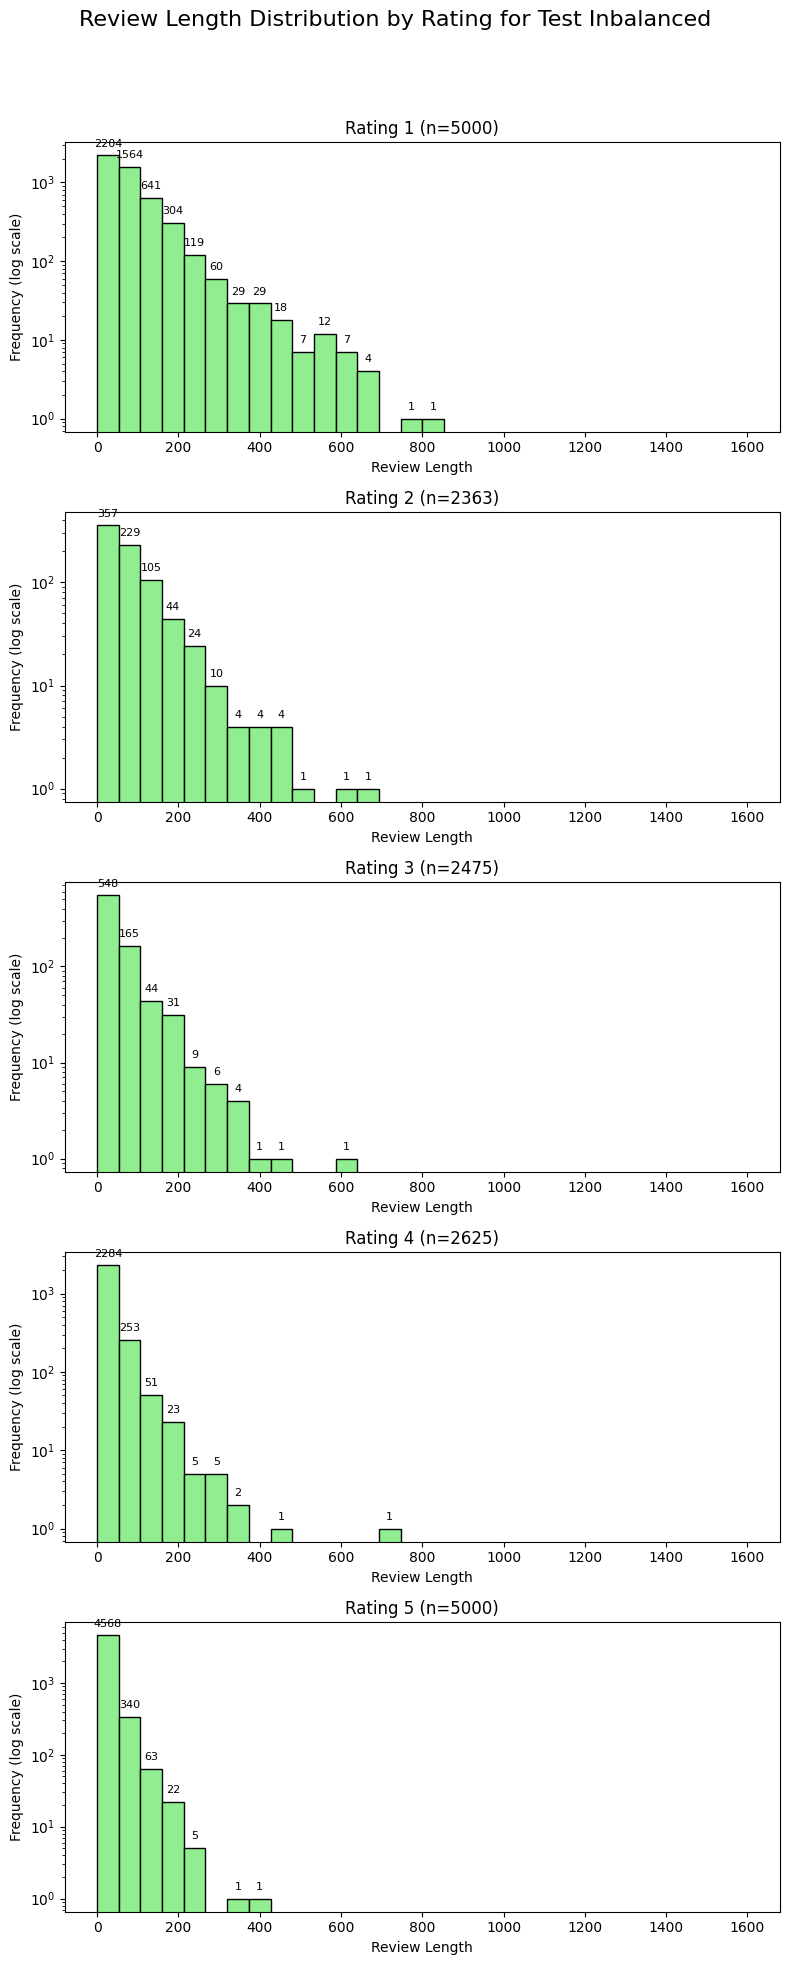

Review counts per unique rating for Aggregated (Train+Val+Test) Inbalanced:
Rating
1    50000
2    23625
3    24753
4    26248
5    50000
Name: count, dtype: int64


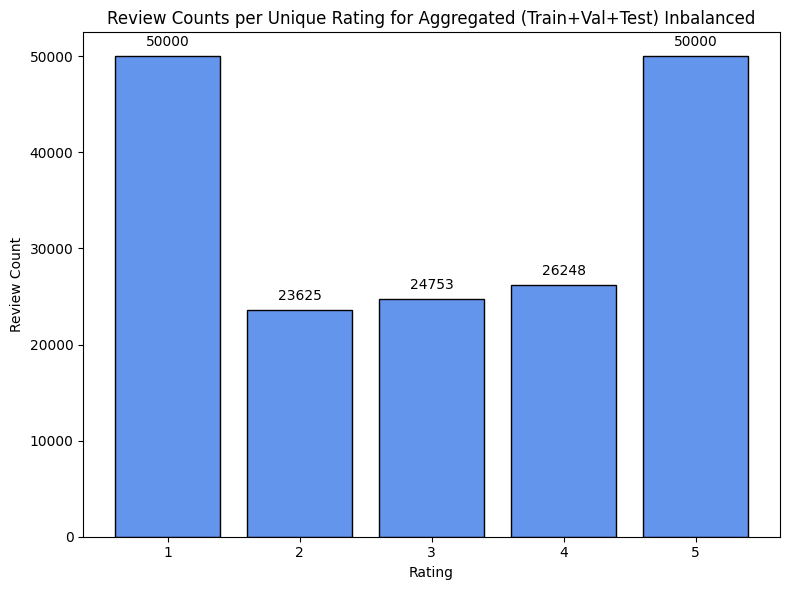

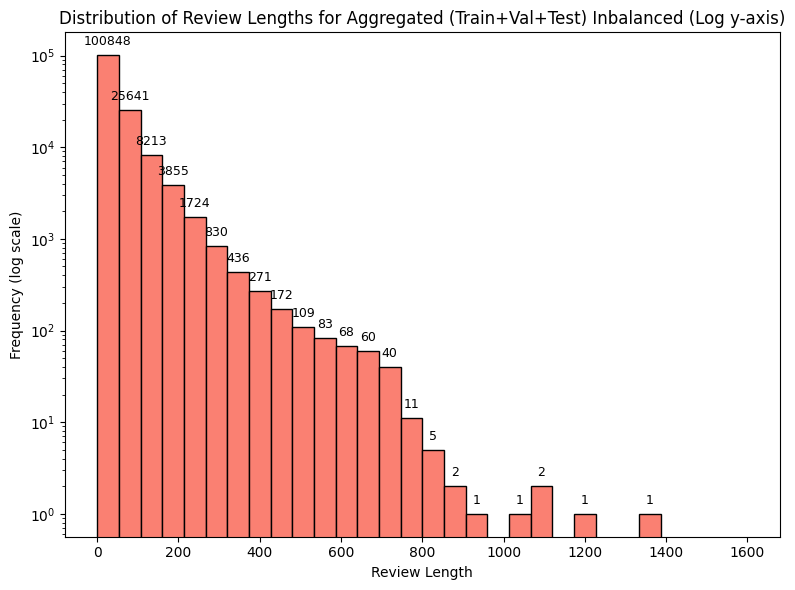

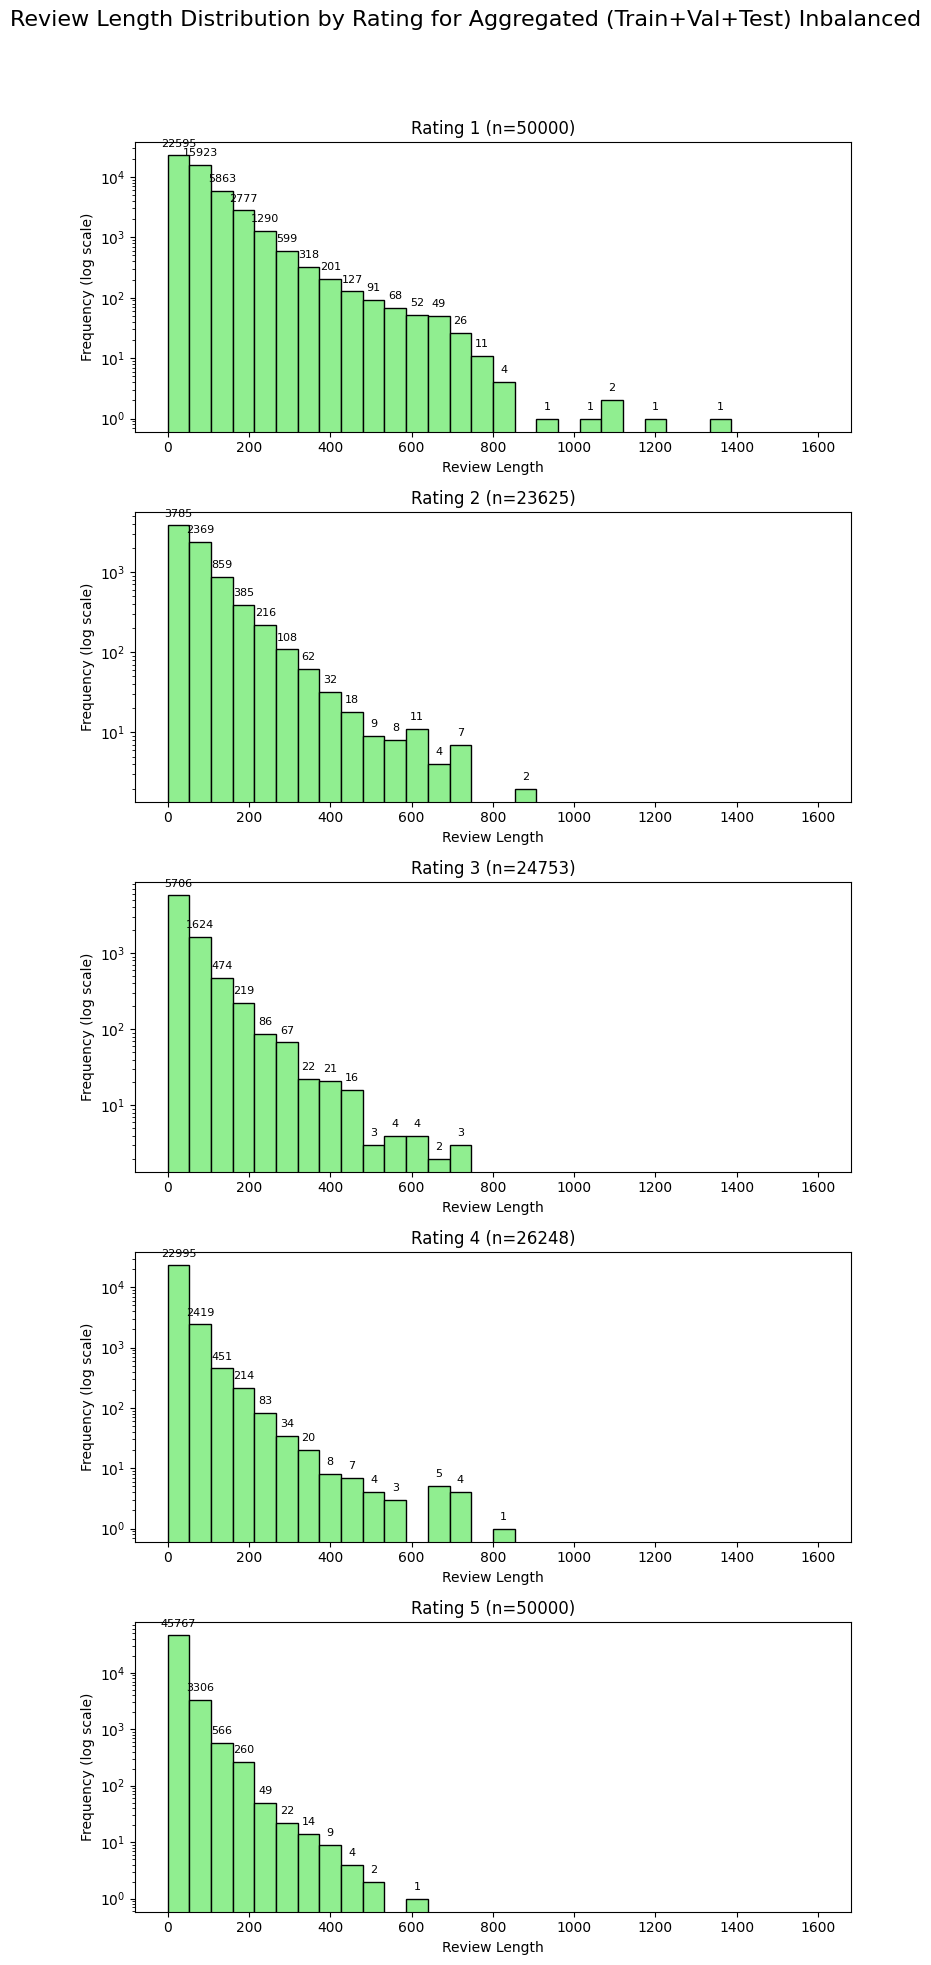

In [22]:
analyze_three_datasets(path_train_inbalanced_downsampled_augmented, path_val_inbalanced_downsampled_augmented, path_test_inbalanced_downsampled_augmented, 'Inbalanced')